# Final Project Part 2: Exploratory Data Analysis on Lending Club loan data.

In [ ]:
#I need to thank Kaggle for giving me a lot of plotting ideas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 6,4

In [17]:
df_loan = pd.read_csv(r"C:\Users\Ann\Desktop\GA_DataScience\loan.csv",low_memory=False)

In [18]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [19]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(df_loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [21]:
print(df_loan.shape)
print(df_loan.isnull().sum().value_counts())

(887379, 74)
0         34
866007    12
29         7
70276      3
886868     2
152        1
4          1
502        1
51462      1
761351     1
866569     1
145        1
44825      1
886870     1
868762     1
750326     1
454312     1
252971     1
53         1
665676     1
17659      1
dtype: int64


Distribution of Loan Amount and Interest Rates

C:\Users\Ann\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


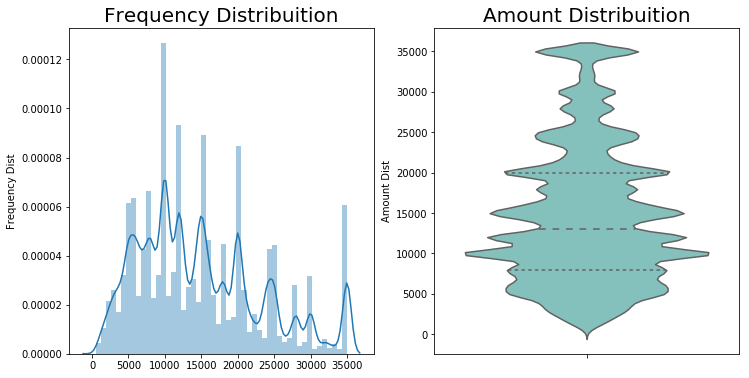

In [25]:
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(df_loan["loan_amnt"])
g.set_xlabel("", fontsize=10)
g.set_ylabel("Frequency Dist", fontsize=10)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=df_loan, 
               inner="quartile", palette="GnBu")
g1.set_xlabel("", fontsize=10)
g1.set_ylabel("Amount Dist", fontsize=10)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

C:\Users\Ann\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


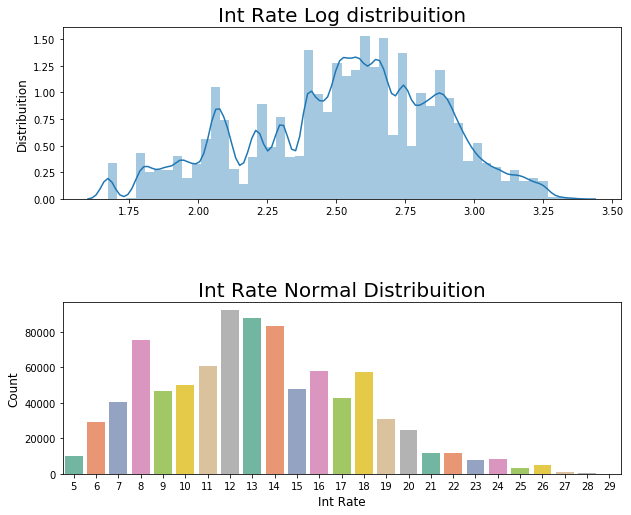

In [27]:
df_loan['int_round'] = df_loan['int_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(df_loan["int_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Int Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=df_loan, 
                   palette="Set2")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Int Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

Loan Status

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


Text(0.5,1,'Loan Status Count')

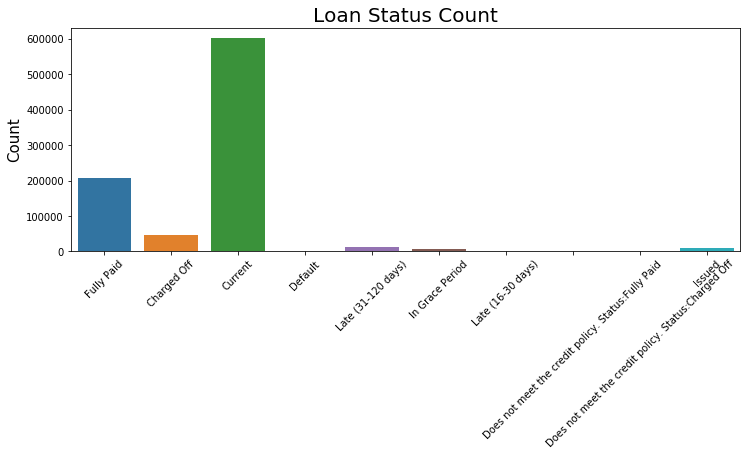

In [28]:
print(df_loan.loan_status.value_counts())

plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_loan)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

Loan status by years and looking at default

In [29]:
df_loan['issue_month'], df_loan['issue_year'] = df_loan['issue_d'].str.split('-', 1).str

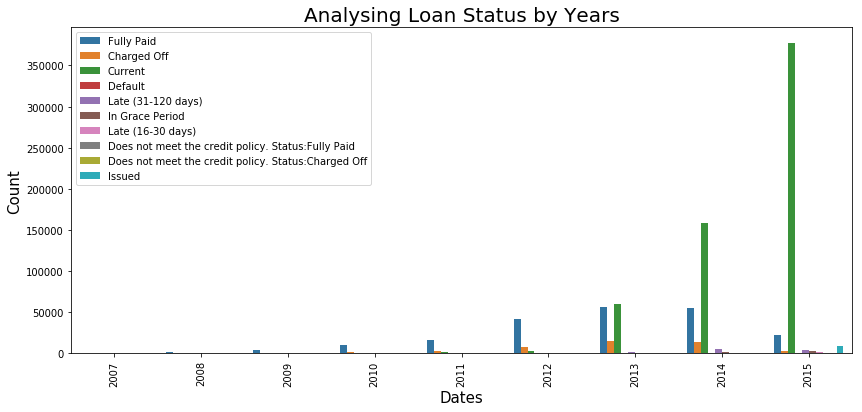

In [30]:
plt.figure(figsize = (14,6))
g = sns.countplot(x='issue_year', data=df_loan,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

No handles with labels found to put in legend.


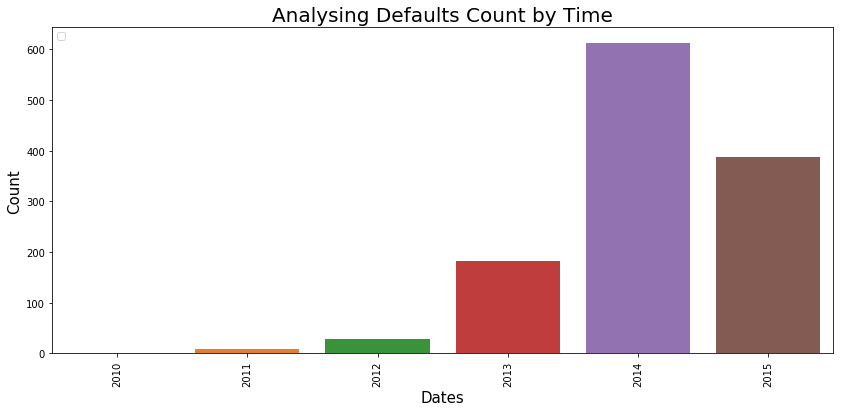

In [31]:
plt.figure(figsize = (14,6))
g = sns.countplot(x='issue_year', data=df_loan[df_loan['loan_status'] =='Default'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Defaults Count by Time", fontsize=20)
plt.show()

#defaults seems to be a lot higher in 2014

In [35]:
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("yellow", as_cmap=True)
pd.crosstab(df_loan[purp_loan[0]], df_loan[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,,
car,448,4937,10,13,51,3198,40,81,15,70
credit_card,7826,149835,233,69,271,42250,1150,2071,381,2096
debt_consolidation,27599,356239,790,292,808,120764,3998,4796,1510,7419
educational,56,1,0,32,65,269,0,0,0,0
home_improvement,2269,34980,47,71,143,12660,367,493,137,662
house,286,1854,7,11,33,1366,37,37,15,61
major_purchase,874,10308,14,23,100,5391,125,184,51,207
medical,569,5324,15,22,36,2285,56,91,17,125
moving,425,3121,11,15,31,1603,43,52,23,90


In [37]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("yellow", as_cmap=True)
pd.crosstab(df_loan[loan_grade[0]], df_loan[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2617,9519,12642,10486,6258,2934,792
Current,103322,171735,171175,91984,47061,13589,2913
Default,47,198,360,312,201,79,22
Does not meet the credit policy. Status:Charged Off,8,85,148,197,158,93,72
Does not meet the credit policy. Status:Fully Paid,90,269,481,494,378,154,122
Fully Paid,39679,66546,52678,30020,12928,4726,1146
In Grace Period,365,1240,1887,1405,908,354,94
Issued,1448,2529,2472,1185,593,194,39
Late (16-30 days),134,410,678,569,368,155,43


In [39]:
loan_home = ['loan_status', 'home_ownership']
cm = sns.light_palette("yellow", as_cmap=True)
pd.crosstab(df_loan[loan_home[0]], df_loan[loan_home[1]]).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0,19878,7,27,4025,21311
Current,2,303764,2,3,62041,235967
Default,0,498,0,0,110,611
Does not meet the credit policy. Status:Charged Off,0,348,1,11,49,352
Does not meet the credit policy. Status:Fully Paid,0,908,4,27,138,911
Fully Paid,1,104966,36,114,17960,84646
In Grace Period,0,2855,0,0,637,2761
Issued,0,4220,0,0,1038,3202
Late (16-30 days),0,1101,0,0,260,996


C:\Users\Ann\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


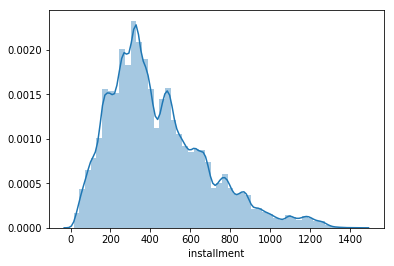

In [40]:
sns.distplot(df_loan['installment'])
plt.show()

Status by Installment

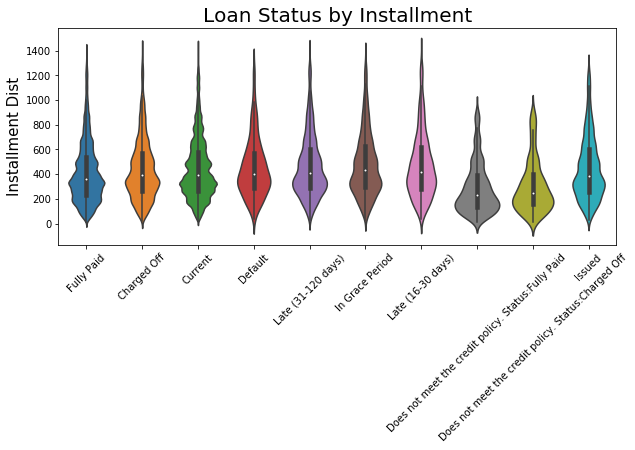

In [43]:
plt.figure(figsize = (10,4))

g = sns.violinplot(x='loan_status', y="installment",
                   data=df_loan)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Installment Dist", fontsize=15)
g.set_title("Loan Status by Installment", fontsize=20)

plt.show()

In [44]:
loan_application = ['loan_status', 'application_type']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_application[0]], df_loan[loan_application[1]]).style.background_gradient(cmap = cm)

application_type,INDIVIDUAL,JOINT
loan_status,,
Charged Off,45248,0
Current,601338,441
Default,1219,0
Does not meet the credit policy. Status:Charged Off,761,0
Does not meet the credit policy. Status:Fully Paid,1988,0
Fully Paid,207722,1
In Grace Period,6250,3
Issued,8396,64
Late (16-30 days),2357,0


Purposes count description: 
application_type    INDIVIDUAL  JOINT
purpose                              
car                       8862      1
credit_card             206067    115
debt_consolidation      523881    334
educational                423      0
home_improvement         51803     26
house                     3707      0
major_purchase           17275      2
medical                   8538      2
moving                    5413      1
other                    42867     27
renewable_energy           575      0
small_business           10375      2
vacation                  4735      1
wedding                   2347      0


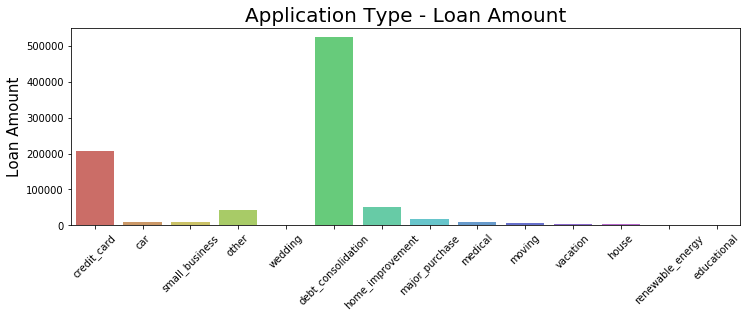

In [46]:
print("Purposes count description: ")
print(pd.crosstab(df_loan.purpose, df_loan.application_type))

plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.countplot(x="purpose",data=df_loan,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.show()

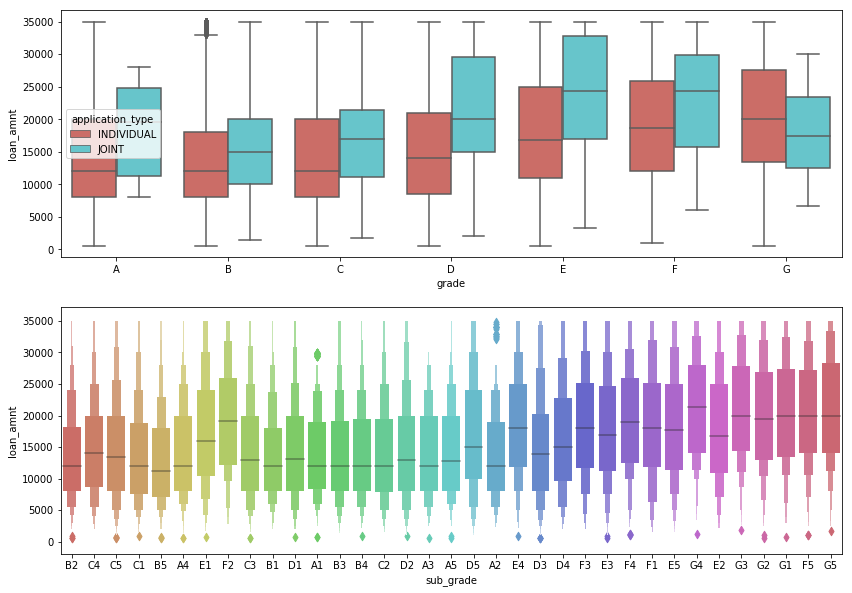

In [55]:
fig, ax = plt.subplots(2,1, figsize=(14,10))
sns.boxplot(x="grade", y="loan_amnt", data=df_loan,
            palette="hls",ax=ax[0], hue="application_type", 
            order=["A",'B','C','D','E','F', 'G'])
sns.lvplot(x="sub_grade", y="loan_amnt",data=df_loan, 
               palette="hls", ax=ax[1])

plt.show()

In [62]:
print('Term x application type Description')
print(pd.crosstab(df_loan.term, df_loan.application_type))


Term x application type Description
application_type  INDIVIDUAL  JOINT
term                               
 36 months            620886    239
 60 months            265982    272


In [63]:
adress_loan = ['addr_state', 'loan_status']
cm = sns.light_palette("yellow", as_cmap=True)
pd.crosstab(df_loan[adress_loan[0]], df_loan[adress_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
addr_state,,,,,,,,,,
AK,96,1469,2,1,4,567,15,14,6,31
AL,662,7576,9,8,24,2485,111,122,43,160
AR,337,4637,8,6,9,1417,57,70,13,86
AZ,1049,13577,39,18,33,5028,143,193,50,282
CA,7332,81851,211,101,223,35778,906,1147,327,1641
CO,784,12573,25,13,52,4829,106,166,57,202
CT,614,9353,8,12,50,3067,126,139,29,133
DC,87,1543,2,2,8,750,10,13,0,17
DE,121,1730,5,4,18,546,21,28,7,31
